<a href="https://colab.research.google.com/github/Kmjng/Voice_Recognition_Deep_Learning/blob/main/preprocessing_gfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
from google.colab import files
from google.colab import drive
drive.mount('/gdrive', force_remount=True)



Mounted at /gdrive


# 음성데이터 세션 나누기

In [ ]:
AI_root = glob.glob(r"/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/*")
ori_root = glob.glob(r"/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/원본/*")
X_path = AI_root + ori_root
print(X_path)

['/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.vampire - ROSÉ (ai cover).wav', "/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Taylor Swift IA - we can't be friends (wait for your love) (artificial intelligence version).wav", '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Passenger - LET HER GO (ED SHEERAN - A.I COVER LYRICS).wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Jungkook - Off My Face (AI Cover).wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Copy of Standing Next to You - AI theWeeknd.wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Copy of Jungkook - Die For You (AI cover).wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.CHIQUITA Ai Cover “ 2002” (Anne Marie).wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Avril Lavigne - August (Taylor Swift Cover).wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/AI/AI.Avril Lavigne - 3am (Halsey AI Cover).wav', '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/원본/ori.Taylor Swift – august.wav', '/gdrive/MyDrive/빅데이터 45기_파이널 

In [ ]:
pip install pydub

In [ ]:
#음원 구간별 추출
from pydub import AudioSegment
import os

for a in X_path:
  # wav 파일 로드
  audio = AudioSegment.from_wav(a)

  # 분할 간격 설정 (밀리초 단위)
  interval = 10 * 1000  # 10초 = 10,000 밀리초
  step = 5 * 1000  # 5초 = 5,000 밀리초

  # 전체 길이
  length = len(audio) #밀리초로 환산됨


  # 저장할 디렉토리 설정
  output_dir = r'/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save'

  # 분할 및 저장
  for i in range(0, length, step):
      start_time = i  # 시작 시간 (밀리초 단위)
      end_time = i + interval  # 종료 시간 (밀리초 단위)
      split_audio = audio[start_time:end_time]
      start_sec = start_time // 1000  # 시작 시간 (초 단위)
      end_sec = end_time // 1000  # 종료 시간 (초 단위)
      filename = os.path.join(output_dir, f"output_{start_sec}-{end_sec}_{os.path.basename(a)}.wav")
      split_audio.export(filename, format="wav")
      print(f"Saved {filename}")

  print("분할 완료")


Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_0-10_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_5-15_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_10-20_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_15-25_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_20-30_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_25-35_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_30-40_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_35-45_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_40-50_AI.vampire - ROSÉ (ai cover).wav.wav
Saved /gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_45-55_AI.vampire - ROSÉ (

# 모델링 시작

In [ ]:
#구간별 추출한 데이터 경로 저장
X_path_new = glob.glob(r"/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/*")
print(len(X_path_new))

800


In [ ]:
data_to_remove = '/gdrive/MyDrive/빅데이터 45기_파이널 프로젝트/음원데이터/save/output_250-260_ori.Passenger - Let Her Go.wav.wav'

# 데이터 삭제
if data_to_remove in X_path_new:
    X_path_new.remove(data_to_remove)

print(len(X_path_new))

799


In [ ]:
import ntpath # 특정 경로에서 파일들을 가져오는 라이브러리
y = np.empty((0, 1)) # 비어있는 리스트 만들기

for f in X_path_new:
    if 'ori' in ntpath.basename(f): #  음성 데이터가 있는 디렉토리의 데이터가 '원본' 음성 : 0
        resp = np.array([0])  #   [0]
    elif 'AI' in ntpath.basename(f): # 음성 데이터가 있는 디렉토리의 데이터가 'AI' 음성 : 1
        resp = np.array([1])  # [1]
    resp = resp.reshape(1, 1)
    y = np.vstack((y, resp))
print (y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [ ]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_path_new, y, test_size=0.25, random_state=42)
print(len(X_train)) # 600
print(len(X_test)) # 200

599
200


In [ ]:
# 첫 번째 파일의 샘플 레이트 확인
sample_rate = librosa.load(X_train[0],sr = 16000)[1]
print(sample_rate)

16000


In [ ]:
# 음성파일 읽기 & 디지털 변환 함수
def librosa_read_wav_files(wav_files):
    if not isinstance(wav_files, list): # isinstance(1, int) # 1이 int형인지 알아본다. 결과는 True
        wav_files = [wav_files]
    return [librosa.load(f, sr = 16000)[0] for f in wav_files] # 음성파일 읽기

In [ ]:
# train/test 음성파일 읽기
X_train2 = librosa_read_wav_files(X_train)
X_test2  = librosa_read_wav_files(X_test)
print(len(X_train2)) # 600
print(len(X_test2)) # 200


599
200


In [ ]:
pip install librosa gammatone scipy numpy

In [ ]:
# 오디오 특징 추출 함수
from gammatone.gtgram import gtgram
from scipy.fftpack import dct

def extract_gfcc(y, sample_rate, num_gfcc=13, win_length=0.025, hop_length=0.01, f_min=50):
    # 윈도우 길이와 홉 길이를 샘플 단위로 변환
    win_length_samples = int(win_length * sample_rate)
    hop_length_samples = int(hop_length * sample_rate)

    # Gammatone 스펙트로그램 계산
    nfft = 512  # FFT 포인트 수
    channels = num_gfcc
    gtg = gtgram(y, sample_rate, win_length_samples / sample_rate, hop_length_samples / sample_rate, channels, f_min)
    print(gtg)
    # 로그 스펙트로그램 계산 (안정화 위해 작은 값 추가)
    epsilon = 1e-10  # 작은 값 추가
    log_gtg = np.log(gtg + epsilon)

    # DCT(Discrete Cosine Transform)를 사용하여 GFCC 계산
    #gfcc = librosa.feature.mfcc(S=log_gtg, n_mfcc=num_gfcc)
    gfcc = dct(log_gtg, type=2, axis=0, norm='ortho')[:num_gfcc]

    if np.isnan(gfcc).any():
        print("NaN detected in GFCC extraction")

    return gfcc

def extract_features(audio_samples, sample_rate):
    extracted_features = np.empty((0, 101)) # (1,41) : 41개의 값을 받을 메모리를 할당하겠다는 뜻
    if not isinstance(audio_samples, list):
        audio_samples = [audio_samples]

    for sample in audio_samples:
        zero_cross_feat = librosa.feature.zero_crossing_rate(sample).mean()
        gfccs = extract_gfcc(sample, sample_rate, num_gfcc=100) # 오디오에서 100개 특징 추출
        gfccsscaled = np.mean(gfccs.T, axis=0)  # 각 주파수별 평균값을 구하기
        gfccsscaled = np.append(gfccsscaled, zero_cross_feat)
        if np.isnan(gfccsscaled).any():
            print("NaN detected in feature scaling")
        gfccsscaled = gfccsscaled.reshape(1, 101)
        extracted_features = np.vstack((extracted_features, gfccsscaled))
    return extracted_features


'''
def compute_gfcc(y, sample_rate, num_gfcc=13, n_filters=64, win_length=0.025, hop_length=0.01, f_min=50):
    # Compute Gammatone spectrogram
    gt_spectrogram = gtgram(y, sample_rate, win_length, hop_length, n_filters, f_min)

    # Compute log power spectrogram
    log_gt_spectrogram = np.log(gt_spectrogram + 1e-10)

    # Compute DCT to get GFCC
    gfcc = dct(log_gt_spectrogram, type=2, axis=0, norm='ortho')[:num_gfcc]

    return gfcc.T
'''

"\ndef compute_gfcc(y, sample_rate, num_gfcc=13, n_filters=64, win_length=0.025, hop_length=0.01, f_min=50):\n    # Compute Gammatone spectrogram\n    gt_spectrogram = gtgram(y, sample_rate, win_length, hop_length, n_filters, f_min)\n\n    # Compute log power spectrogram\n    log_gt_spectrogram = np.log(gt_spectrogram + 1e-10)\n\n    # Compute DCT to get GFCC\n    gfcc = dct(log_gt_spectrogram, type=2, axis=0, norm='ortho')[:num_gfcc]\n\n    return gfcc.T\n"

In [ ]:
# 오디오 특징 추출
# wave_rate 에 사람음성에 속하는 주파수 영역을 주어야 한다.

X_train_features = extract_features(X_train2, sample_rate) # wav_rate=22050(sample_rate)
X_test_features  = extract_features(X_test2, sample_rate) # wav_rate=22050(sample_rate)
print(X_train_features.shape) # (600, 101)
print(X_test_features.shape) # (200, 101)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [6.67460223e-08 4.55541448e-06 3.87657446e-04 ... 3.17652258e-03
  3.96843813e-03 4.99134559e-03]
 [2.98925646e-08 6.41352568e-06 5.86667920e-04 ... 5.74541168e-03
  7.12102985e-03 8.93894451e-03]
 ...
 [2.22047432e-05 1.33275760e-04 7.00788190e-04 ... 4.14776190e-04
  5.06240295e-04 5.42883356e-04]
 [1.74523961e-05 1.33470866e-04 6.67871234e-04 ... 5.23515931e-04
  5.92759219e-04 6.07690919e-04]
 [1.23200744e-05 1.22352554e-04 6.25432771e-04 ... 5.16668544e-04
  5.71800306e-04 5.74591009e-04]]
[[0.10539305 0.20124309 0.24662929 ... 0.11498393 0.08409181 0.068044  ]
 [0.10833519 0.17487179 0.19306365 ... 0.08951317 0.05541861 0.0482294 ]
 [0.11593154 0.14857733 0.14207111 ... 0.05615587 0.02783919 0.03940173]
 ...
 [0.02490962 0.02389805 0.0203969  ... 0.0128994  0.01531291 0.01405796]
 [0.0236744  0.02229604 0.01814914 ... 0.0101929  0.0121548  0.01142245]
 [0.01917801 0.01779259 0.01417378 ... 0.00709369 0.00860052 0.00844952]]
[[9.38754621e-03 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_features_normalized = scaler.fit_transform(X_train_features)
X_test_features_normalized = scaler.transform(X_test_features)


print("X_train_features_normalized shape:", X_train_features_normalized.shape)
print("X_test_features_normalized shape:", X_test_features_normalized.shape)
#X_train_normalized = scaler.fit_transform(X_train_features.reshape(-1, 1)).flatten()
#X_test_normalized = scaler.fit_transform(X_test_features.reshape(-1, 1)).flatten()
#print(X_train_normalized)
#print(X_test_normalized)

X_train_features_normalized shape: (599, 101)
X_test_features_normalized shape: (200, 101)


In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
# 신경망 구축
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(101,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 23, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 256)           98560     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 10, 256)           0

In [ ]:
# 학습환경
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 여기서는 val_accuracy 모니터링해서 성능이 좋아지지 않으면 조기 종료 하게 함.
early_stop = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)

In [ ]:
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(X_train_features_normalized, y_train, epochs=50, batch_size=32, validation_data=(X_test_features_normalized,y_test), verbose=1,
          callbacks=[early_stop, check_point])


Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.4975
Epoch 1: val_loss improved from inf to 0.68846, saving model to best_model.h5
19/19 [==============================] - 3s 73ms/step - loss: 0.7057 - accuracy: 0.4975 - val_loss: 0.6885 - val_accuracy: 0.5900
Epoch 2/50
 3/19 [===>..........................] - ETA: 0s - loss: 0.6815 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5543
Epoch 2: val_loss improved from 0.68846 to 0.68811, saving model to best_model.h5
19/19 [==============================] - 1s 43ms/step - loss: 0.6845 - accuracy: 0.5543 - val_loss: 0.6881 - val_accuracy: 0.4850
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.6691 - accuracy: 0.6010
Epoch 3: val_loss improved from 0.68811 to 0.67141, saving model to best_model.h5
19/19 [==============================] - 1s 28ms/step - loss: 0.6691 - accuracy: 0.6010 - val_loss: 0.6714 - val_accuracy: 0.5500
Epoch 4/50
18/19 [===========================>..] - ETA: 0s - loss: 0.6412 - accuracy: 0.6215
Epoch 4: val_loss improved from 0.67141 to 0.64807, saving model to best_model.h5
19/19 [==============================] - 1s 29ms/step - loss: 0.6405 - accuracy: 0.6260 - val_loss: 0.6481 - val_accuracy: 0.6000
Epoch 5/50
18/19 [===========================>..] - ETA: 0s - loss: 0.5920 - accuracy: 0.6840

Text(0, 0.5, 'ACC')

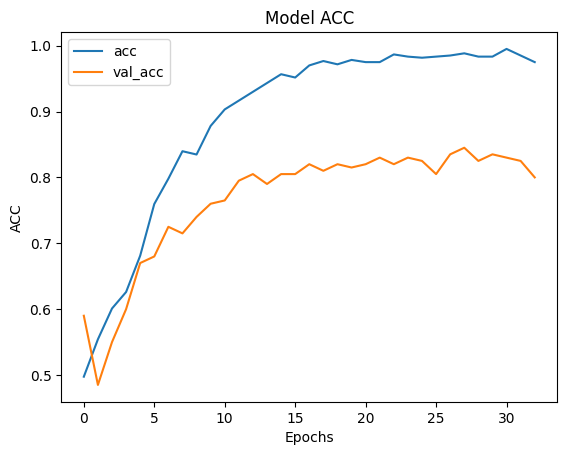

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.title('Model ACC')
plt.xlabel('Epochs')
plt.ylabel('ACC')

In [ ]:
print(np.isnan(X_train_features_normalized).sum())
print(np.isnan(X_test_features_normalized).sum())
print(np.isinf(X_train_features_normalized).sum())
print(np.isinf(X_test_features_normalized).sum())

100
0
0
0
